# Jupyter notebook to test MLFF models 

In [133]:
import inference_functions as ifs
import importlib
import pandas as pd

In [260]:
importlib.reload(ifs)

<module 'inference_functions' from '/mnt/e/Documents/GitHub/MLFF_training/Inference/inference_functions.py'>

## Runs Inference for Mace and Chgnet

### Parse test set

In [135]:
filepath = '/home/nacho/NbOC/VASP/test_set/finished_calcs/'
atoms_list,opt_atoms_list = ifs.read_dft(filepath)


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:03<00:00,  4.91it/s]


### Run inference using MLFF

In [136]:
df_0407= ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-07-2024/bestE_epoch38_e888_f7250_s3257_mNA.pth.tar')
df_0415 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-15-2024/bestE_epoch34_e114_f323_s1109_mNA.pth.tar')
df_0429 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-29-2024/bestE_epoch40_e54_f723_s1061_mNA.pth.tar')
df_0529 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/relaxed_052924-290524.p/bestE_epoch26_e383_f495_s1317_mNA.pth.tar')
df_0415 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-15-2024/bestE_epoch34_e114_f323_s1109_mNA.pth.tar')
df_long68 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/long_68_aimd-120524/bestE_epoch20_e2_f52_s37_mNA.pth.tar')
df_long0526 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/data_052624_mixed-290524.p/bestE_epoch28_e56_f272_s755_mNA.pth.tar')
df_all = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_AIMD_52424-240524.p/bestE_epoch32_e4_f87_s330_mNA.pth.tar')
df_061024 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_data_060924-090624.p/bestE_epoch43_e82_f300_s1347_mNA.pth.tar')
df_binary = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/binary_061024-100624.p/bestE_epoch45_e5_f87_s170_mNA.pth.tar')
df_mace = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/2024-01-07-mace-128-L2_epoch-199.model',mace_flag=True)
df_mace_small = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/L0-small.model',mace_flag=True)
df_clean_relaxed = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/clean_relaxed.model',mace_flag=True)

Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running MACE
Running MACE
Running MACE


## Example of a MLFF model Dataframe 

In [265]:
df_0407

,File,DFT E,Opt Δ (DFT),MLFF E,ΔE,Opt ΔE (MLFF),Opt ΔΔE,Forces MSE,natom,DFT Rank,MLFF Rank,Rank ρ
0,struct5_natom4,-31.273,5.842,-33.206,1.933,5.785,0.058,0.398,4,1.0,1.0,1.0
1,struct1_natom4,-30.973,6.272,-33.205,2.232,5.596,0.676,0.000,4,2.0,2.0,1.0
2,struct3_natom4,-27.417,9.787,-30.184,2.767,8.670,1.118,1.682,4,3.0,3.0,1.0
3,struct2_natom4,-27.297,9.957,-27.505,0.208,11.310,-1.353,0.000,4,4.0,4.0,1.0
4,struct4_natom4,-23.295,4.083,-25.699,2.405,4.951,-0.868,0.000,4,5.0,5.0,1.0
5,struct3_natom16,-111.467,7.783,-120.489,9.023,4.276,3.507,0.000,16,1.0,1.0,1.0
6,struct2_natom16,-109.918,40.168,-113.943,4.025,41.165,-0.997,0.096,16,2.0,2.0,1.0
7,struct5_natom16,-104.152,30.536,-109.977,5.825,31.529,-0.993,1.269,16,3.0,3.0,1.0
8,struct4_natom16,-102.680,47.857,-105.132,2.452,52.484,-4.627,0.428,16,4.0,4.0,1.0
9,struct1_natom16,-31.092,88.171,-55.535,24.443,73.677,14.494,15.250,16,5.0,5.0,1.0


## Graphs comparing inference on a test set

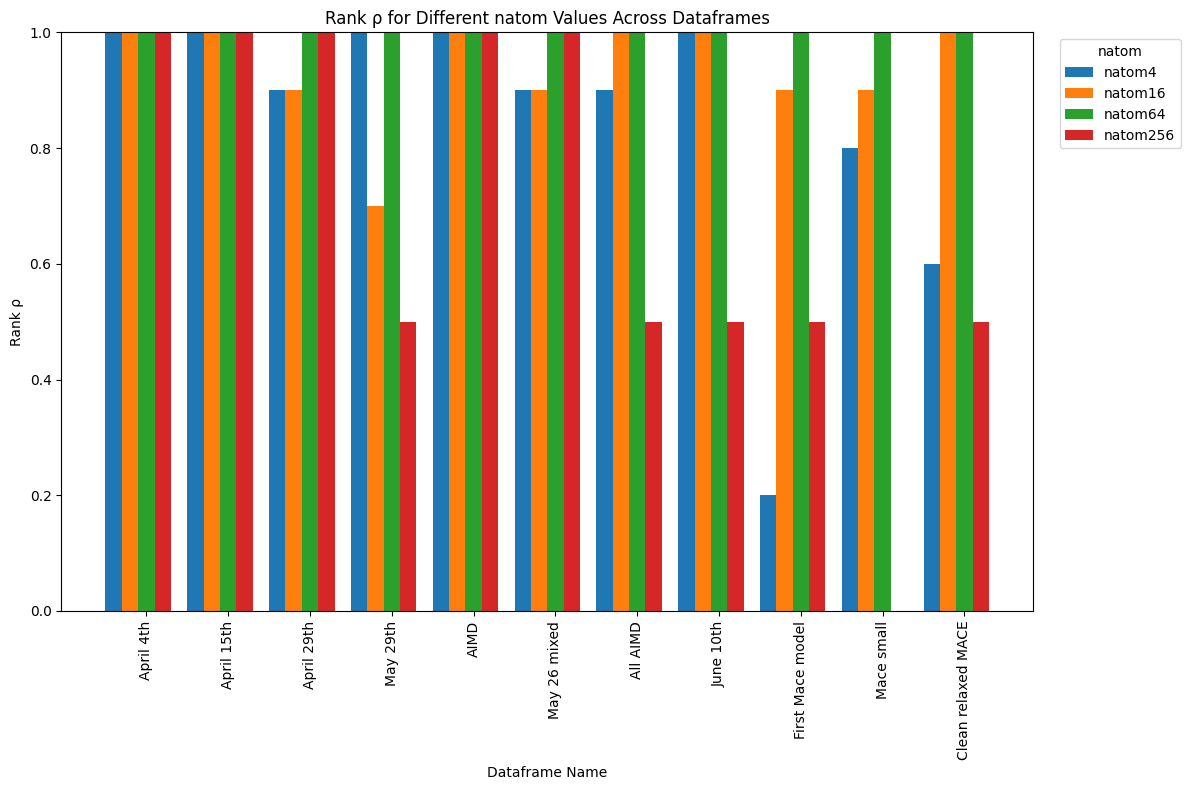

In [263]:
ifs.plot_rank_correlation(dataframes,dataframe_names)

In [200]:
dataframes = [df_0407,df_0415,df_0429,df_0529,df_0415,df_long68,df_long0526,df_061024,df_mace,df_mace_small,df_clean_relaxed]
dataframe_names = ['April 4th', 'April 15th','April 29th', 'May 29th','AIMD','May 26 mixed','All AIMD','June 10th','First Mace model','Mace small','Clean relaxed MACE']

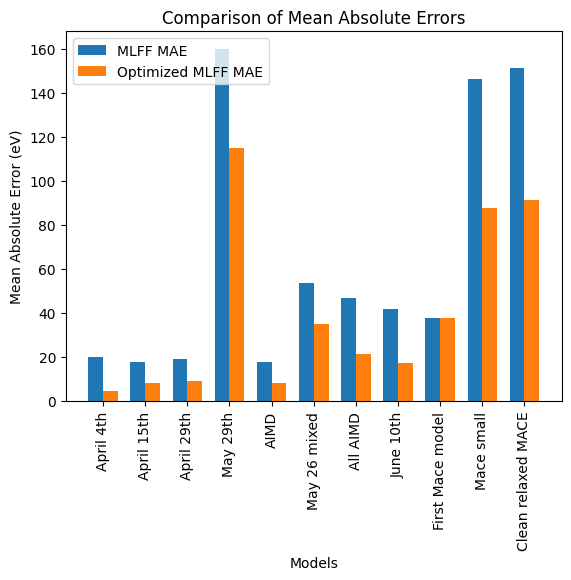

In [14]:
ifs.plot_mae_comparison(dataframes,dataframe_names)

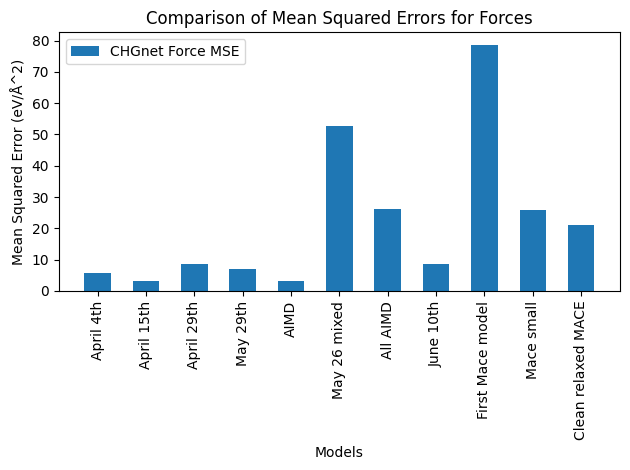

In [15]:
ifs.plot_mse_comparison(dataframes,dataframe_names)

## Running Geometry optimization with Chgnet

### June 10th model on natoms64 NbOC 

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu
MLFF vs DFT comparison:
Volume: MLFF = 1266.693, DFT = 935.184, Difference (DFT - MLFF) = -331.509
Distance between atoms 0 and 1: MLFF = 5.728, DFT = 5.193, Difference (DFT - MLFF) = -0.535
Lattice parameters a: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters b: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters c: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168


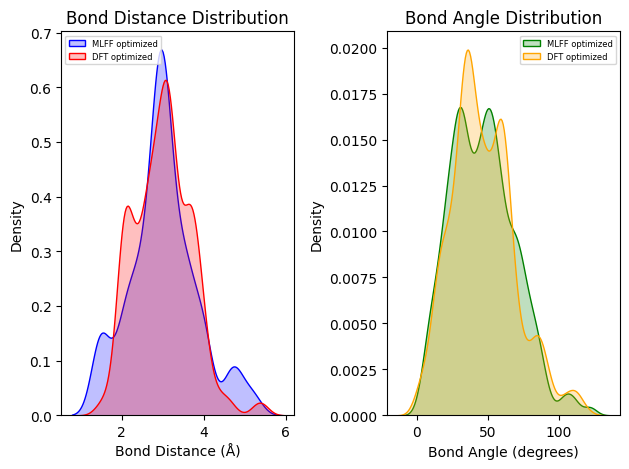

In [32]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestE_epoch28_e74_f276_s1343_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.optimization_summary(struct,last_struct)
ifs.plot_bond_distributions(struct,last_struct)

In [34]:
ifs.visualize_trajectory(traj,struct,dft_energy)

### June 10th , binary AIMD data

In [16]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestE_epoch28_e74_f276_s1343_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'

traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu


In [17]:
ifs.visualize_trajectory(traj,struct,dft_energy)

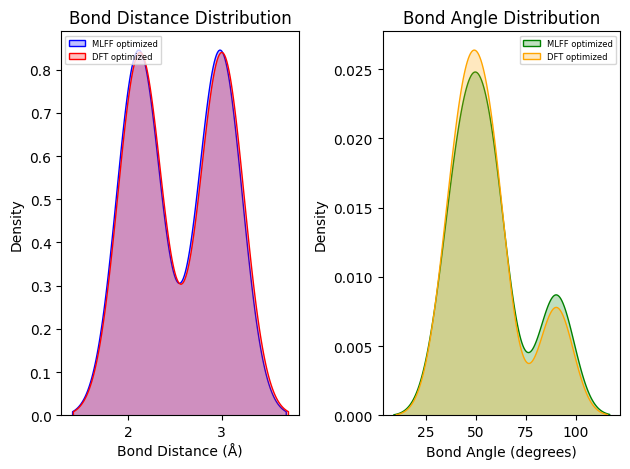

In [18]:
ifs.plot_bond_distributions(struct,last_struct)

In [19]:
ifs.optimization_summary(struct,last_struct)

MLFF vs DFT comparison:
Volume: MLFF = 74.624, DFT = 76.059, Difference (DFT - MLFF) = 1.435
Distance between atoms 0 and 1: MLFF = 2.977, DFT = 2.996, Difference (DFT - MLFF) = 0.019
Lattice parameters a: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters b: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters c: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027


### June 10th binary, best forces model 

In [20]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestF_epoch26_e75_f275_s1335_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.visualize_trajectory(traj,struct,dft_energy)
ifs.optimization_summary(struct,last_struct)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu


MLFF vs DFT comparison:
Volume: MLFF = 74.624, DFT = 76.059, Difference (DFT - MLFF) = 1.435
Distance between atoms 0 and 1: MLFF = 2.977, DFT = 2.996, Difference (DFT - MLFF) = 0.019
Lattice parameters a: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters b: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters c: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027


### 04/29 Model 

In [21]:
model_path = '/home/nacho/NbOC/CHGnet/04-29-2024/bestE_epoch40_e54_f723_s1061_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'

traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu


In [22]:
ifs.visualize_trajectory(traj,struct,dft_energy)

In [23]:
ifs.optimization_summary(struct,last_struct)

MLFF vs DFT comparison:
Volume: MLFF = 74.624, DFT = 76.059, Difference (DFT - MLFF) = 1.435
Distance between atoms 0 and 1: MLFF = 2.977, DFT = 2.996, Difference (DFT - MLFF) = 0.019
Lattice parameters a: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters b: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters c: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027


### Only binary oxides trained. 

In [24]:
model_path = '/home/nacho/NbOC/CHGnet/binary_061024-100624.p/bestE_epoch45_e5_f87_s170_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.visualize_trajectory(traj,struct,dft_energy)
ifs.optimization_summary(struct,last_struct)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu


MLFF vs DFT comparison:
Volume: MLFF = 74.624, DFT = 76.059, Difference (DFT - MLFF) = 1.435
Distance between atoms 0 and 1: MLFF = 2.977, DFT = 2.996, Difference (DFT - MLFF) = 0.019
Lattice parameters a: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters b: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters c: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027


## MACE optimization 

In [27]:
model_path = '/home/nacho/NbOC/MACE/2024-01-07-mace-128-L2_epoch-199.model'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
opt_struct,dft_struct = ifs.mace_optimize(model_path,outcar_path,fmax=.001)

No dtype selected, switching to float64 to match model dtype.
      Step     Time          Energy          fmax
FIRE:    0 14:50:54     -283.556144       42.588061
FIRE:    1 14:50:54     -317.507985       37.793669
FIRE:    2 14:50:55     -346.137433       38.153367
FIRE:    3 14:50:56     -371.638286       35.367270
FIRE:    4 14:50:57     -393.560183       28.651781
FIRE:    5 14:50:57     -411.607810       21.231204
FIRE:    6 14:50:58     -426.198230       14.891762
FIRE:    7 14:50:59     -438.043211       10.132385
FIRE:    8 14:51:00     -447.818063        8.834043
FIRE:    9 14:51:01     -456.028790        7.605711
FIRE:   10 14:51:02     -463.009740        6.136845
FIRE:   11 14:51:02     -468.985486        5.091432
FIRE:   12 14:51:03     -474.146878        4.673523
FIRE:   13 14:51:04     -478.637059        4.433295
FIRE:   14 14:51:05     -482.498575        4.160673
FIRE:   15 14:51:06     -485.715560        3.879520
FIRE:   16 14:51:06     -488.294272        3.603225
FIRE

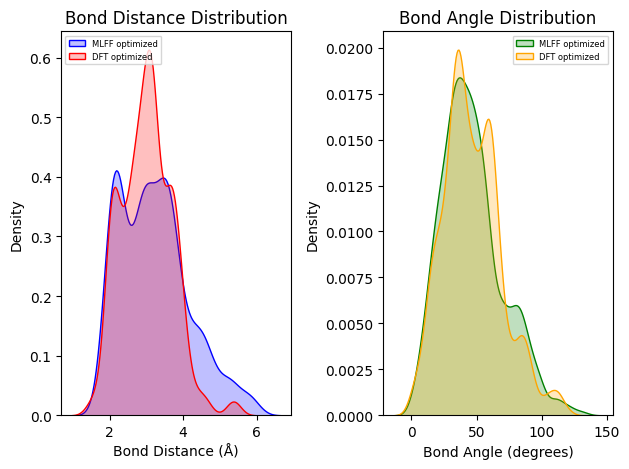

MLFF vs DFT comparison:
Volume: MLFF = 1266.693, DFT = 935.184, Difference (DFT - MLFF) = -331.509
Distance between atoms 0 and 1: MLFF = 5.103, DFT = 5.193, Difference (DFT - MLFF) = 0.09
Lattice parameters a: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters b: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters c: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168


In [37]:
ifs.plot_bond_distributions(opt_struct,dft_struct)
ifs.optimization_summary(opt_struct,dft_struct)